# Example code to import karst network graph data from csv files

In [ ]:

import networkx as nx
import pandas as pd
import networkx as nx
import os

# clone https://github.com/ERC-Karst/KNtools and 'pip install e .' inside the main folder
import kntools as kt


## 0. Choose which cave to import:
you can find the list of cave in the caves_properties_summary.csv and png visualization in the figures folder. Any cave number starting with the letter C or S is not opendata and a data request from the members of the ERC-Karst project can be sent to celia.trunz@unine.ch


In [2]:
#change number and corresponding cave name
number = '001'
cavename = 'GouffreDejaVu'


## 1. Load data from .csv files

In [3]:
# define the path to the folder containing the csv files
#change input path if necessary. if notebook is run in the original repository, then this should work
csvfolder_path = f'../data/{number}_{cavename}/clean_data/clean_graph_csv/'

### 1.1 load only the edges
For example, if you want to work only with the graph topology, without any node attributes (such as coordinates or conduit geometry)

In [4]:
#load csv data (this could be done with something else than pandas) 
df_edge = pd.read_csv(os.path.join(csvfolder_path, f'{cavename}_edges.csv'), delimiter=';')

# Initiate graph object
G = nx.Graph()

# add edges to graph from the dataframe
G.add_edges_from(zip(df_edge.from_id,df_edge.to_id))


### 1.2 add some edges attributes, if there is any

In [5]:
#create a dictionnary formated the right way to import as edge attributes
# this need to be a dictionnary with tuple of edge data as keys, and the flag(s) a
path_to_edge_flags = os.path.join(csvfolder_path, f'{cavename}_edge_flags.csv')
if os.path.exists(path_to_edge_flags)==True:
    df_edge_flag = pd.read_csv(path_to_edge_flags, delimiter=';')
    dict_edge_flag = kt.list2dict(list(zip(df_edge_flag.from_id,df_edge_flag.to_id)),df_edge_flag.flag)
    nx.set_edge_attributes(G, dict_edge_flag,'flags')

else:
    print('There is no flags on edges to add')



There is no flags on edges to add


### 1.3 add some node attributes
The node attributes 'pos', 'fulladdress', and 'idsql' always exist in the repository,
while 'flags', 'splays', 'csdim', 'splays' depend on whether or not the information exists for each cave.

This is an example of attributes that can be added to the graph. 
To load all the attributes, use the function `kt.load_clean_graph_csv`

In [6]:
# add positions (x,y,z)
print('adding node position')
df_node_pos = pd.read_csv(os.path.join(csvfolder_path, f'{cavename}_node_pos.csv'), delimiter=';')
dict_node_pos = dict(zip(df_node_pos.id,zip(df_node_pos.x,df_node_pos.y,df_node_pos.z))) 
nx.set_node_attributes(G,dict_node_pos,'pos')  

# add node dimensions (width, height)
if os.path.exists(os.path.join(csvfolder_path, f'{cavename}_node_csdim.csv'))==True:
    print('adding conduit width and height on nodes')
    df_node_csdim = pd.read_csv(os.path.join(csvfolder_path, f'{cavename}_node_csdim.csv'), delimiter=';')
    dict_node_csdim = dict(zip(df_node_csdim.id,zip(df_node_csdim.cswidth,df_node_csdim.csheight)))  
    nx.set_node_attributes(G,dict_node_csdim,'csdim') 
else:
    print('there is no node dimensions to add')

# # add node flags
if os.path.exists(os.path.join(csvfolder_path, f'{cavename}_node_flags.csv'))==True:
    print('adding flags on nodes')
    df_node_flags = pd.read_csv(os.path.join(csvfolder_path,  f'{cavename}_node_flags.csv'), delimiter=';')
    dict_node_flags = kt.list2dict(df_node_flags.id,df_node_flags.flag) 
    nx.set_node_attributes(G,dict_node_flags,'flags')
else:
    print('there is no node flags to add') 

# # add list of splays attached to node in the form of [x,y,z] at the point touching the wall
if os.path.exists(os.path.join(csvfolder_path, f'{cavename}_node_splays.csv'))==True:
    print('adding splays on nodes')
    df_node_splays = pd.read_csv(os.path.join(csvfolder_path,  f'{cavename}_node_splays.csv'), delimiter=';')
    dict_node_splays = kt.list2dict(df_node_splays.id,list(zip(df_node_splays.x,df_node_splays.y,df_node_splays.z))) 
    nx.set_node_attributes(G,dict_node_splays,'splays') 
else:
    print('there is no node splays to add')


adding node position
adding conduit width and height on nodes
there is no node flags to add
adding splays on nodes


## 2. Load all the data from .csv files with one function


In [7]:

#LOAD CAVE GRAPH
H = kt.load_clean_graph_csv(csvfolder_path)
# it is possible to choose which attribute to add with a list of string 
# ex: kt.load_clean_graph_csv(csvfolder_path, 
#                             node_attributes=['pos','csdim','flags','fulladdress','idsql','splays','comments'],
#                             edge_attributes=['flags'])
# if they exist they will be added to the graph


loading GouffreDejaVu_edges.csv
loading GouffreDejaVu_node_csdim.csv
loading GouffreDejaVu_node_fulladdress.csv
loading GouffreDejaVu_node_idsql.csv
loading GouffreDejaVu_node_pos.csv
loading GouffreDejaVu_node_splays.csv


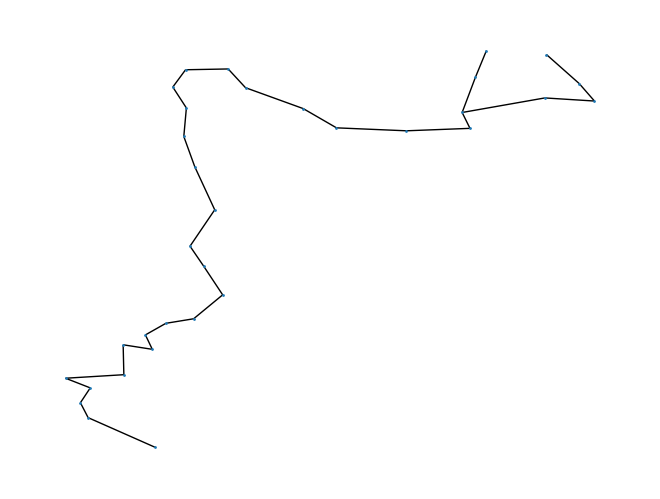

In [ ]:
#BASIC PLOT IN PLAN VIEW FROM NETWORKX

#example to display the data
nx.draw(G,pos=kt.get_pos2d(G), node_size=1)

